# Objective : Web Services  Classification 
## Our goal is to build a baseline model with at least 80% accuracy

## 1. Load Python Modules

In [43]:
# Basic Libraries
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

# Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import class_weight

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tabulate import tabulate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Ignore warnings
warnings.filterwarnings('ignore')


## 2. Reading the Web Services dataset

In [44]:
input_csv = f"Balanced_Top_25_Web_Services.csv"
df = pd.read_csv(input_csv)
print(df)
print(df["Grouped Category"].nunique())
print(df["Grouped Category"].value_counts())

     Service Classification Grouped Category  \
0                 Financial        Financial   
1                  Payments        Financial   
2                 Financial        Financial   
3                   Banking        Financial   
4                  Payments        Financial   
...                     ...              ...   
9995              eCommerce        eCommerce   
9996              eCommerce        eCommerce   
9997              eCommerce        eCommerce   
9998              eCommerce        eCommerce   
9999              eCommerce        eCommerce   

                                    Service Description  
0     The OCBC Property Loans API provides an update...  
1     This Vantiv Cloud Lane API provides a way to s...  
2     Bit2c Ltd is an Israeli company that provides ...  
3     The Mondo REST API is a banking API that allow...  
4     CoinCard is a service that allows users to sub...  
...                                                 ...  
9995  The CityGri

## 3. Basic Inspection on given dataset

In [45]:
def basic_inspection_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom 5 Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_dataset(df)

Top 5 Records of dataset
  Service Classification Grouped Category  \
0              Financial        Financial   
1               Payments        Financial   
2              Financial        Financial   
3                Banking        Financial   
4               Payments        Financial   

                                 Service Description  
0  The OCBC Property Loans API provides an update...  
1  This Vantiv Cloud Lane API provides a way to s...  
2  Bit2c Ltd is an Israeli company that provides ...  
3  The Mondo REST API is a banking API that allow...  
4  CoinCard is a service that allows users to sub...  

Bottom 5 Records of dataset
     Service Classification Grouped Category  \
9995              eCommerce        eCommerce   
9996              eCommerce        eCommerce   
9997              eCommerce        eCommerce   
9998              eCommerce        eCommerce   
9999              eCommerce        eCommerce   

                                    Service Description 

## 4. Handling Missing Values

In [46]:
df.isnull().sum()

Service Classification    0
Grouped Category          0
Service Description       0
dtype: int64

## 5. Categorical- UniVariable - Analysis 

Service Classification frequency table
+----+-------------------------+-----------+
|    |          Class          | Frequency |
+----+-------------------------+-----------+
| 0  |         Medical         |    800    |
| 1  |         Weather         |    400    |
| 2  |         Domains         |    400    |
| 3  |         Social          |    400    |
| 4  |         Mapping         |    400    |
| 5  |       Government        |    400    |
| 6  |         Science         |    400    |
| 7  |         Search          |    400    |
| 8  |        Security         |    400    |
| 9  |         Travel          |    400    |
| 10 |       Advertising       |    400    |
| 11 |        Education        |    400    |
| 12 |          Cloud          |    400    |
| 13 |        Analytics        |    400    |
| 14 |   Internet of Things    |    400    |
| 15 |       Real Estate       |    400    |
| 16 |        eCommerce        |    400    |
| 17 |      News Services      |    400    |
| 18 |     Trans

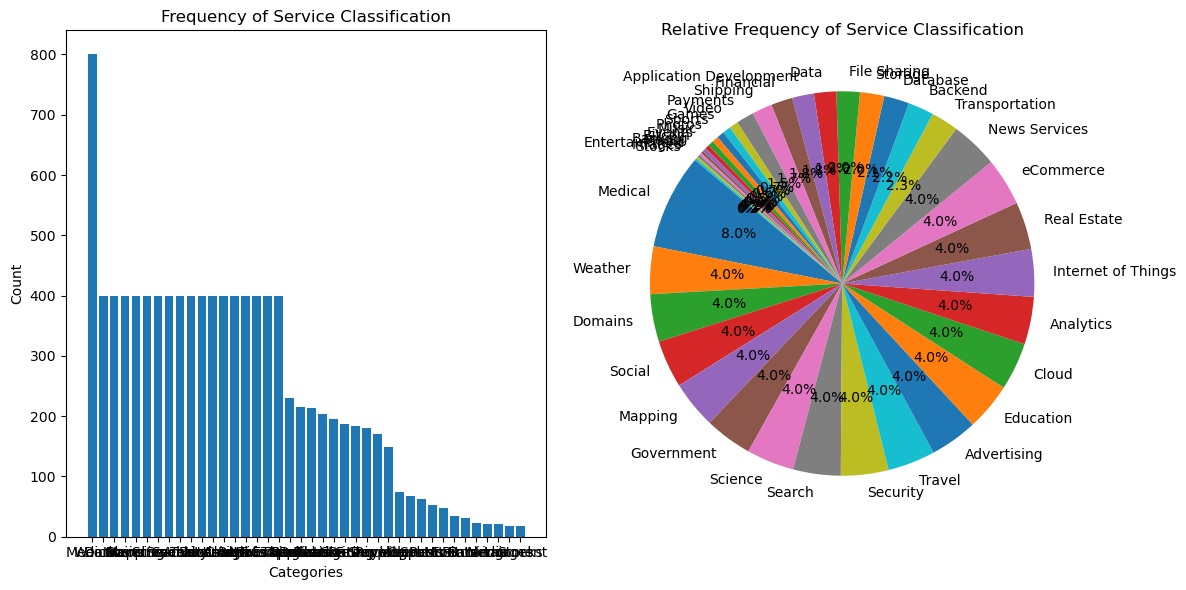

Grouped Category frequency table
+----+---------------------+-----------+
|    |        Class        | Frequency |
+----+---------------------+-----------+
| 0  |      Financial      |    400    |
| 1  |     Advertising     |    400    |
| 2  |       Social        |    400    |
| 3  |       Mapping       |    400    |
| 4  |      Logistics      |    400    |
| 5  |     Government      |    400    |
| 6  |       Science       |    400    |
| 7  |    Data Services    |    400    |
| 8  |       AppDev        |    400    |
| 9  |       Search        |    400    |
| 10 |      Security       |    400    |
| 11 |       Travel        |    400    |
| 12 |      Education      |    400    |
| 13 | Media/Entertainment |    400    |
| 14 |       Storage       |    400    |
| 15 |        Cloud        |    400    |
| 16 |       Weather       |    400    |
| 17 |      Analytics      |    400    |
| 18 |         IoT         |    400    |
| 19 |     Healthcare      |    400    |
| 20 |     Real Estate  

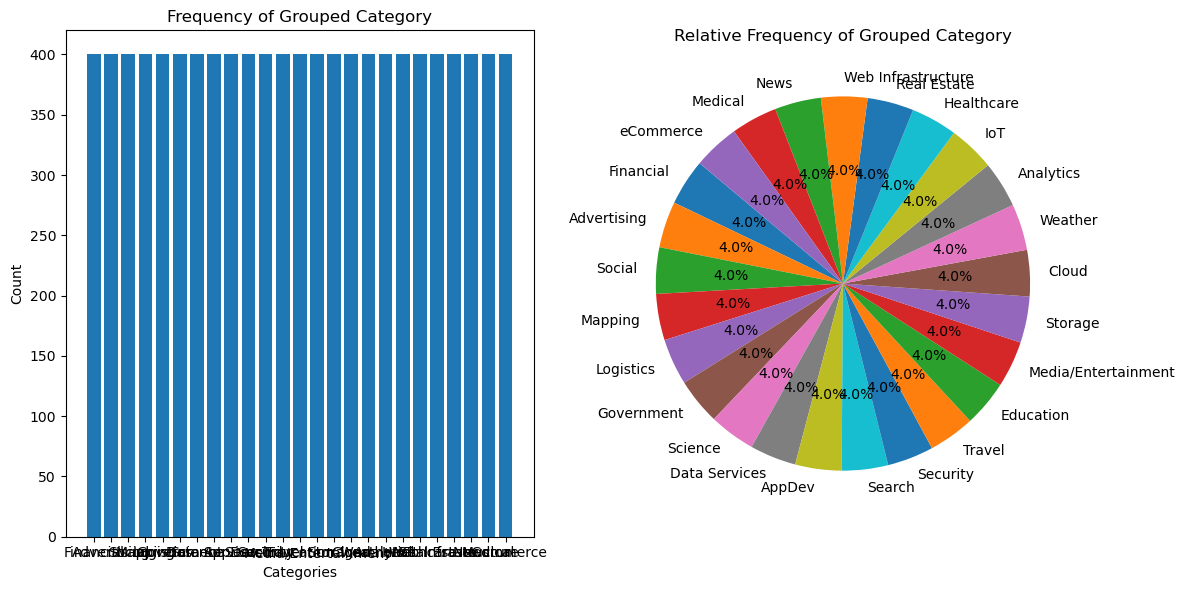

In [47]:

class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
            
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(df[["Service Classification", "Grouped Category"]])

## 6. Preprocessing Web Service Descriptions

In [48]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return " ".join(lemmatized_tokens)


df['Processed Description'] = df['Service Description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 7. Feature Extraction from Web Service Descriptions using TF-IDF and Sentence Transformers (all-MiniLM-L6-v2)

In [49]:
def vectorize_descriptions(service_list, max_features=1000):
    """
    Converts a list of service descriptions into a DataFrame of TF-IDF features.
    Limits to top `max_features` terms by importance across the corpus.
    """
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(service_list)
    feature_names = vectorizer.get_feature_names_out()
    
    return pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


def embed_descriptions_with_sbert(services, model_name='all-MiniLM-L6-v2'):
    """
    Converts service descriptions into SBERT embeddings using SentenceTransformer.
    """
    model = SentenceTransformer(model_name)
    embeddings = model.encode(services, show_progress_bar=True)
    
    return pd.DataFrame(embeddings, index=services.index if isinstance(services, pd.Series) else None)


In [50]:
n=25

tfidf_df = vectorize_descriptions(df['Processed Description'])
tfidf_output_csv = f"Processed_Top_{n}_Web_Services_TFIDF.csv"
tfidf_df.to_csv(tfidf_output_csv, encoding='utf-8', index=False, header=True)
print(f"TF-IDF features saved to: {tfidf_output_csv}")

embedding_df = embed_descriptions_with_sbert(df['Processed Description'])
embedding_output_csv = f"Processed_Top_{n}_Web_Services_SBERT_Embeddings.csv"
embedding_df.to_csv(embedding_output_csv, encoding='utf-8', index=False, header=True)
print(f"SBERT embeddings saved to: {embedding_output_csv}")


TF-IDF features saved to: Processed_Top_25_Web_Services_TFIDF.csv



Batches:   0%|          | 0/313 [00:00<?, ?it/s]

SBERT embeddings saved to: Processed_Top_25_Web_Services_SBERT_Embeddings.csv


## 8. Models
### 8.1 TF-IDF
### 8.2 SBERT
### 8.3 TF-IDF + SBERT
###  8.4  SBERT with Scaling
### 8.5  TF-IDF + SBERT with Scaling

## 9. Web Service Classification using Logistic Regression

In [51]:
lr_model_results = []


TF-IDF with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.93      0.89      0.91        75
          Analytics       0.86      0.84      0.85        80
             AppDev       0.76      0.81      0.79        75
              Cloud       0.74      0.80      0.77        85
      Data Services       0.67      0.53      0.59        81
          Education       0.94      0.90      0.92        83
          Financial       0.82      0.79      0.80        86
         Government       0.86      0.95      0.91        86
         Healthcare       0.47      0.58      0.52        71
                IoT       0.92      0.88      0.90        98
          Logistics       0.86      0.85      0.86        88
            Mapping       0.86      0.84      0.85        83
Media/Entertainment       0.82      0.83      0.82        90
            Medical       0.52      0.41      0.46        79
               News       0.86 

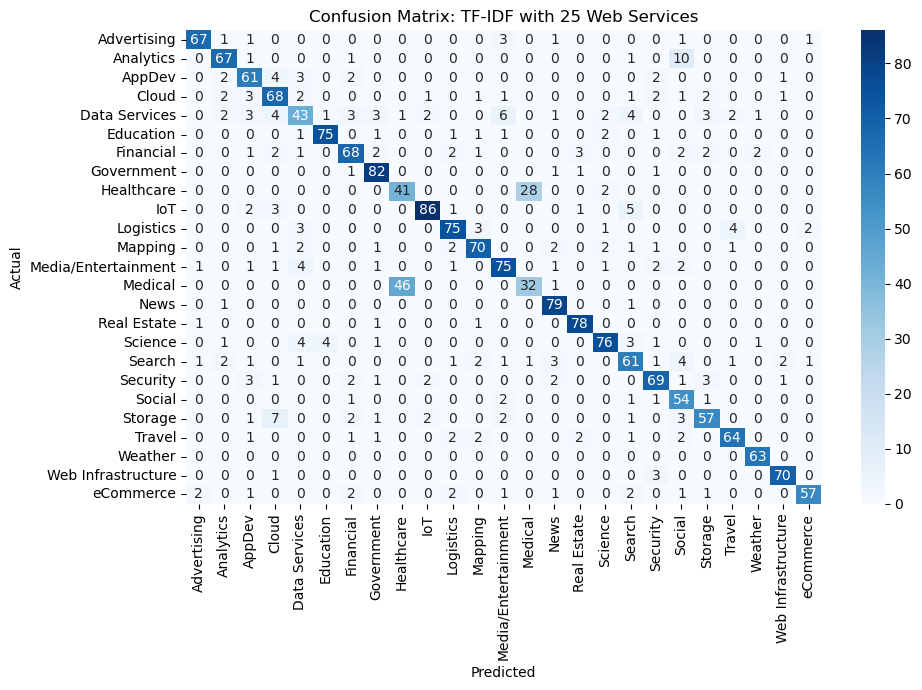


SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.85      0.84      0.85        75
          Analytics       0.63      0.71      0.67        80
             AppDev       0.64      0.63      0.63        75
              Cloud       0.68      0.64      0.65        85
      Data Services       0.57      0.44      0.50        81
          Education       0.80      0.82      0.81        83
          Financial       0.82      0.81      0.82        86
         Government       0.80      0.78      0.79        86
         Healthcare       0.44      0.49      0.46        71
                IoT       0.77      0.82      0.79        98
          Logistics       0.76      0.84      0.80        88
            Mapping       0.82      0.84      0.83        83
Media/Entertainment       0.72      0.84      0.78        90
            Medical       0.52      0.47      0.49        79
               News       0.89  

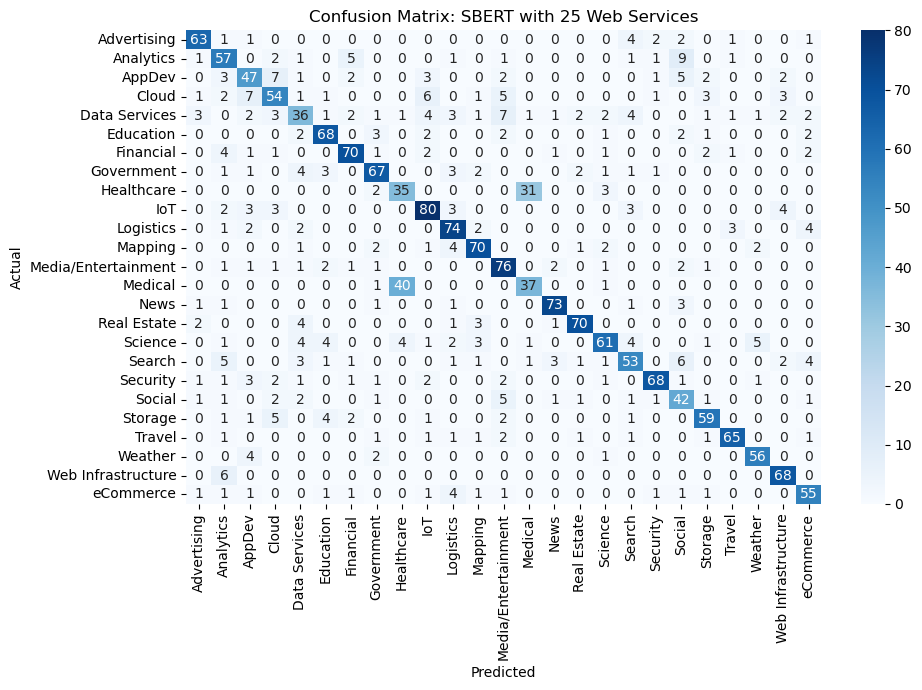


TFIDF + SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.92      0.95        75
          Analytics       0.85      0.86      0.86        80
             AppDev       0.84      0.87      0.86        75
              Cloud       0.78      0.81      0.80        85
      Data Services       0.77      0.57      0.65        81
          Education       0.89      0.90      0.90        83
          Financial       0.87      0.88      0.88        86
         Government       0.89      0.92      0.90        86
         Healthcare       0.44      0.52      0.48        71
                IoT       0.91      0.91      0.91        98
          Logistics       0.86      0.88      0.87        88
            Mapping       0.90      0.93      0.91        83
Media/Entertainment       0.80      0.93      0.86        90
            Medical       0.51      0.44      0.48        79
               News     

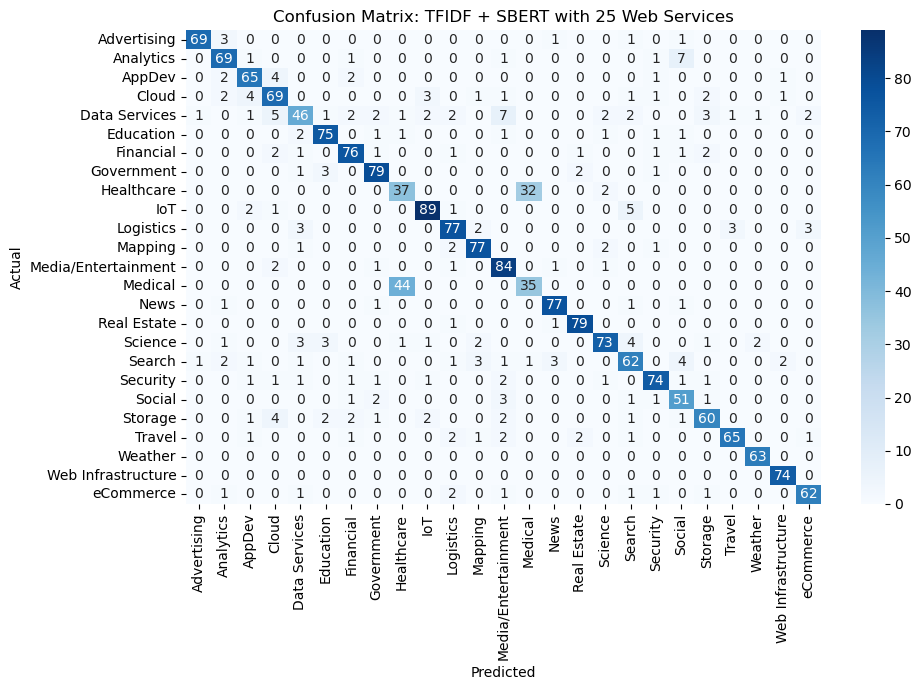


SBERT(Scaled) with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       1.00      0.91      0.95        75
          Analytics       0.93      0.95      0.94        80
             AppDev       0.89      0.88      0.89        75
              Cloud       0.89      0.91      0.90        85
      Data Services       0.75      0.75      0.75        81
          Education       0.87      0.95      0.91        83
          Financial       0.94      0.88      0.91        86
         Government       0.92      0.94      0.93        86
         Healthcare       0.47      0.61      0.53        71
                IoT       0.93      0.98      0.96        98
          Logistics       0.93      0.91      0.92        88
            Mapping       0.91      0.89      0.90        83
Media/Entertainment       0.90      0.90      0.90        90
            Medical       0.53      0.41      0.46        79
               News     

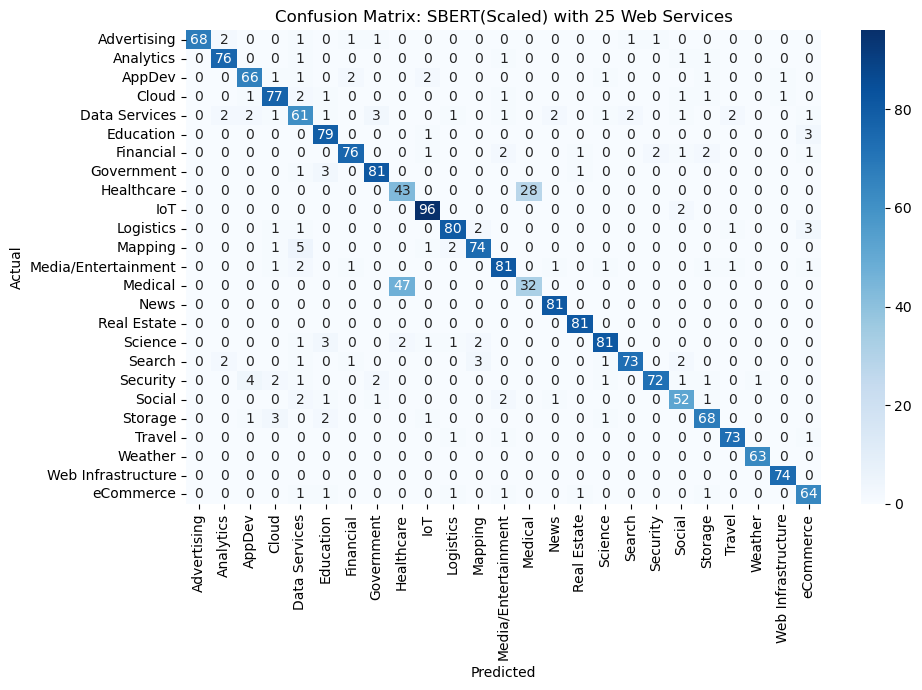


TFIDF + SBERT (Scaled) with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       1.00      0.91      0.95        75
          Analytics       0.93      0.95      0.94        80
             AppDev       0.89      0.88      0.89        75
              Cloud       0.91      0.91      0.91        85
      Data Services       0.78      0.75      0.77        81
          Education       0.87      0.96      0.91        83
          Financial       0.94      0.90      0.92        86
         Government       0.90      0.94      0.92        86
         Healthcare       0.47      0.56      0.51        71
                IoT       0.93      0.98      0.96        98
          Logistics       0.93      0.91      0.92        88
            Mapping       0.91      0.89      0.90        83
Media/Entertainment       0.91      0.90      0.91        90
            Medical       0.53      0.44      0.48        79
               

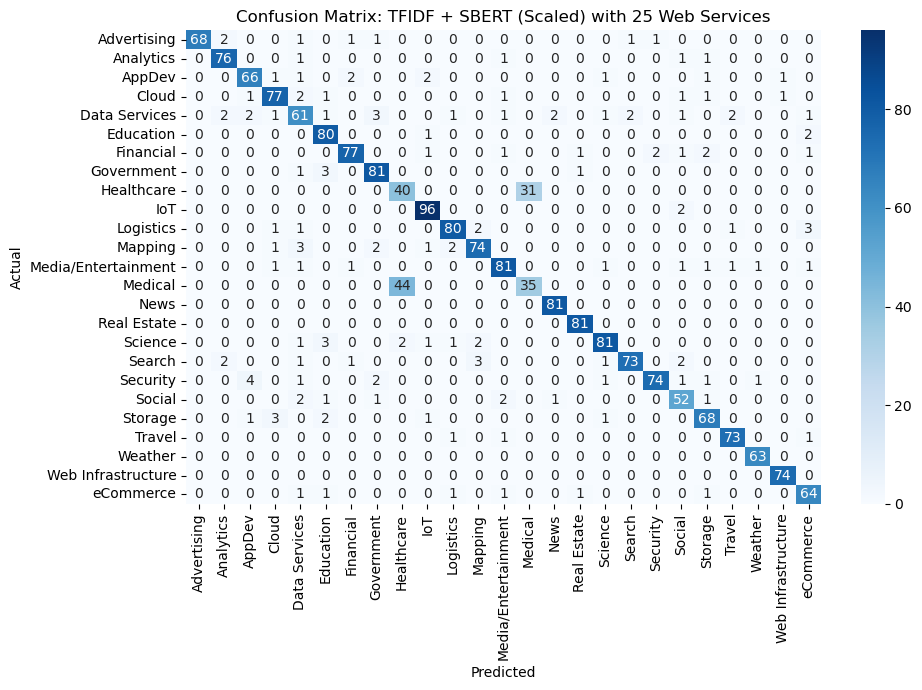

In [52]:

def train_and_report_logistic(X_train, X_test, y_train, y_test, name="Model"):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    print("\nConfusion Matrix:\n")

    # Heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return {
        "model": f"LogisticRegression  {name}",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    
for n in [25]:

    tfidf_df = pd.read_csv(f"Processed_Top_25_Web_Services_TFIDF.csv")
    sbert_df = pd.read_csv(f"Processed_Top_25_Web_Services_SBERT_Embeddings.csv")
    original_df = pd.read_csv(f"Balanced_Top_25_Web_Services.csv")
    labels = original_df['Grouped Category'].fillna("Unknown")

    combined_df = pd.concat([tfidf_df, sbert_df], axis=1)


    X_train, X_test, y_train, y_test = train_test_split(combined_df, labels, test_size=0.2, random_state=42)
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_df, labels, test_size=0.2, random_state=42)
    X_train_sbert, X_test_sbert, _, _ = train_test_split(sbert_df, labels, test_size=0.2, random_state=42)


    result=train_and_report_logistic(X_train_tfidf, X_test_tfidf, y_train, y_test, name=f"TF-IDF with {n} Web Services")
    lr_model_results.append(result)
    result=train_and_report_logistic(X_train_sbert, X_test_sbert, y_train, y_test, name=f"SBERT with {n} Web Services")
    lr_model_results.append(result)
    result=train_and_report_logistic(X_train, X_test, y_train, y_test, name=f"TFIDF + SBERT with {n} Web Services")
    lr_model_results.append(result)
    
    scaler = StandardScaler()
    X_train_sbert_scaled = scaler.fit_transform(X_train_sbert)
    X_test_sbert_scaled = scaler.transform(X_test_sbert)

    X_train_tfidf_scaled = X_train_tfidf  
    X_test_tfidf_scaled = X_test_tfidf

    # Combine scaled features
    X_train_combined = np.hstack([X_train_tfidf_scaled, X_train_sbert_scaled])
    X_test_combined = np.hstack([X_test_tfidf_scaled, X_test_sbert_scaled])
    result=train_and_report_logistic(X_train_sbert_scaled, X_test_sbert_scaled, y_train, y_test, name=f"SBERT(Scaled) with {n} Web Services")
    lr_model_results.append(result)
    result=train_and_report_logistic(X_train_combined, X_test_combined, y_train, y_test, name=f"TFIDF + SBERT (Scaled) with {n} Web Services")
    
    lr_model_results.append(result)


### 9.1 Web Service Classification using Logistic Regression - Summary

                                               model  accuracy  precision  \
0    LogisticRegression  TF-IDF with 25 Web Services    0.8190   0.820737   
1     LogisticRegression  SBERT with 25 Web Services    0.7520   0.753481   
2  LogisticRegression  TFIDF + SBERT with 25 Web ...    0.8435   0.844316   
3  LogisticRegression  SBERT(Scaled) with 25 Web ...    0.8860   0.887894   
4  LogisticRegression  TFIDF + SBERT (Scaled) wit...    0.8880   0.889448   

   recall  f1_score  
0  0.8190  0.817759  
1  0.7520  0.751036  
2  0.8435  0.842381  
3  0.8860  0.885708  
4  0.8880  0.887860  


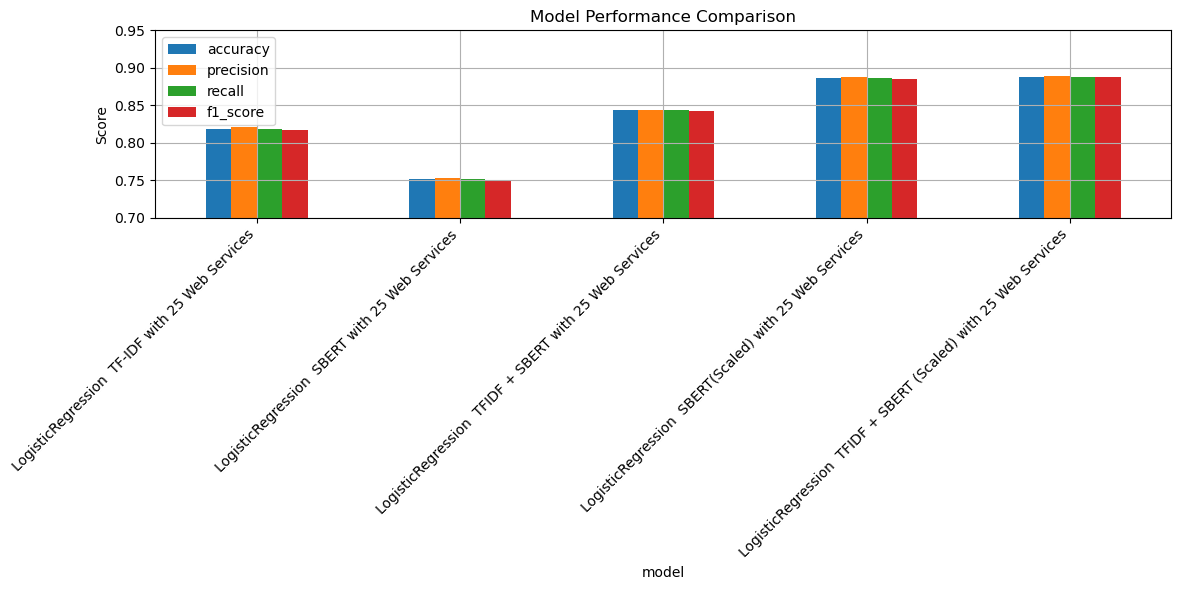

In [53]:
results_df = pd.DataFrame(lr_model_results)
print(results_df)
df_plot = results_df.set_index('model')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.95)
plt.tight_layout()
plt.grid(True)
plt.show()

## 10.  Web Service Classification using Random Forest

In [54]:
rf_model_results = []


 TF-IDF with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.95      0.96        75
          Analytics       0.93      0.96      0.94        80
             AppDev       0.85      0.92      0.88        75
              Cloud       0.91      0.93      0.92        85
      Data Services       0.90      0.77      0.83        81
          Education       0.94      0.95      0.95        83
          Financial       0.90      0.85      0.87        86
         Government       0.93      0.93      0.93        86
         Healthcare       0.47      0.59      0.53        71
                IoT       0.96      0.98      0.97        98
          Logistics       0.96      0.92      0.94        88
            Mapping       0.92      0.93      0.92        83
Media/Entertainment       0.95      0.86      0.90        90
            Medical       0.54      0.43      0.48        79
               News       0.91

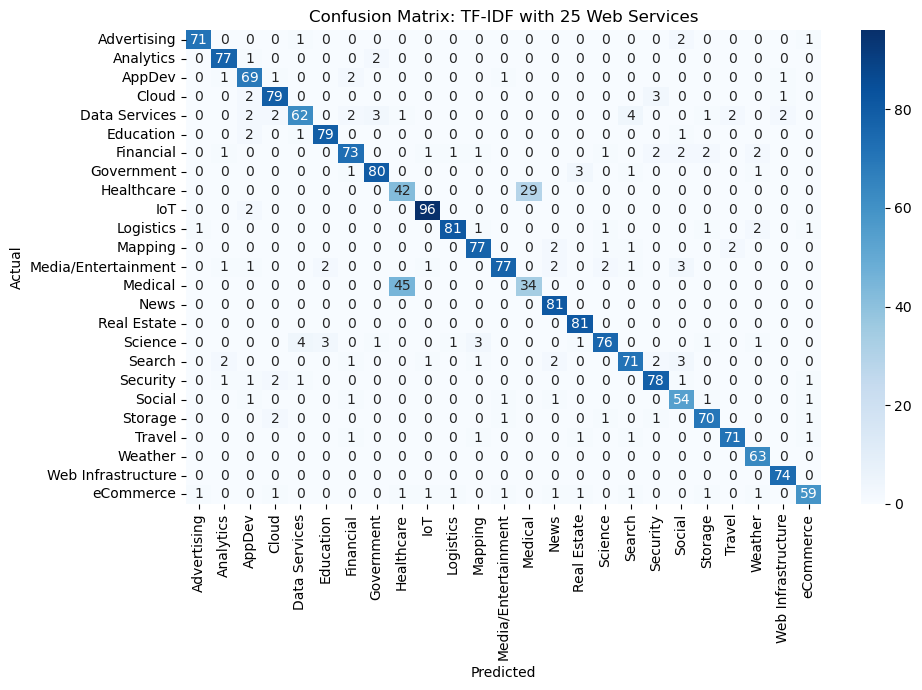


 SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.96      0.91      0.93        75
          Analytics       0.97      0.94      0.96        80
             AppDev       0.80      0.91      0.85        75
              Cloud       0.88      0.93      0.90        85
      Data Services       0.94      0.77      0.84        81
          Education       0.89      0.95      0.92        83
          Financial       0.91      0.87      0.89        86
         Government       0.89      0.94      0.92        86
         Healthcare       0.49      0.61      0.54        71
                IoT       0.99      0.98      0.98        98
          Logistics       0.91      0.92      0.92        88
            Mapping       0.93      0.95      0.94        83
Media/Entertainment       0.85      0.94      0.89        90
            Medical       0.55      0.43      0.48        79
               News       1.00 

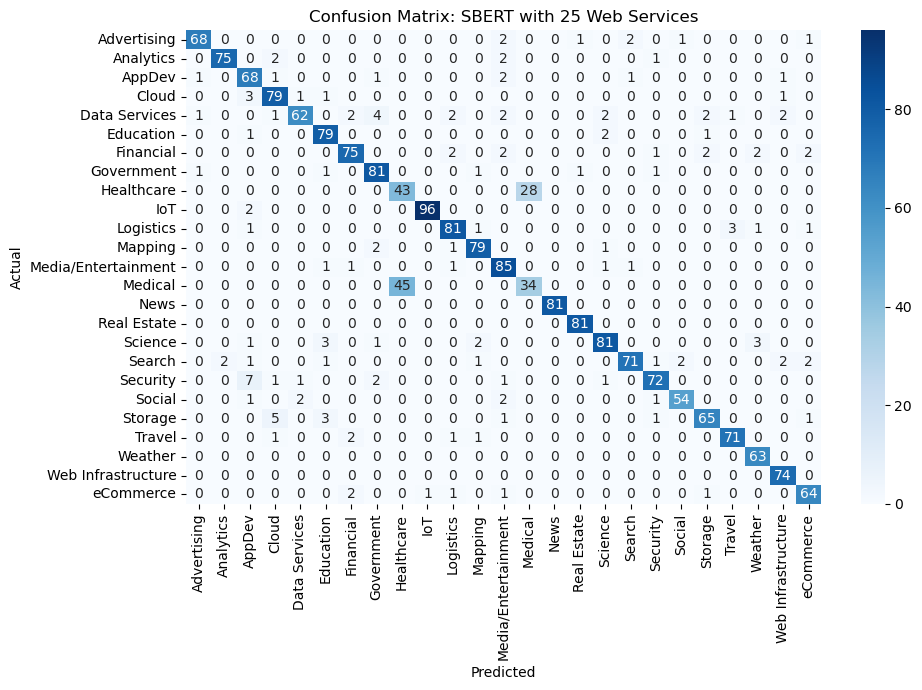


 TFIDF + SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.97      0.97        75
          Analytics       0.95      0.97      0.96        80
             AppDev       0.81      0.87      0.84        75
              Cloud       0.88      0.89      0.89        85
      Data Services       0.91      0.77      0.83        81
          Education       0.90      0.99      0.94        83
          Financial       0.95      0.90      0.92        86
         Government       0.98      0.99      0.98        86
         Healthcare       0.49      0.61      0.54        71
                IoT       0.97      0.98      0.97        98
          Logistics       0.93      0.94      0.94        88
            Mapping       0.94      0.95      0.95        83
Media/Entertainment       0.92      0.91      0.92        90
            Medical       0.55      0.43      0.48        79
               News    

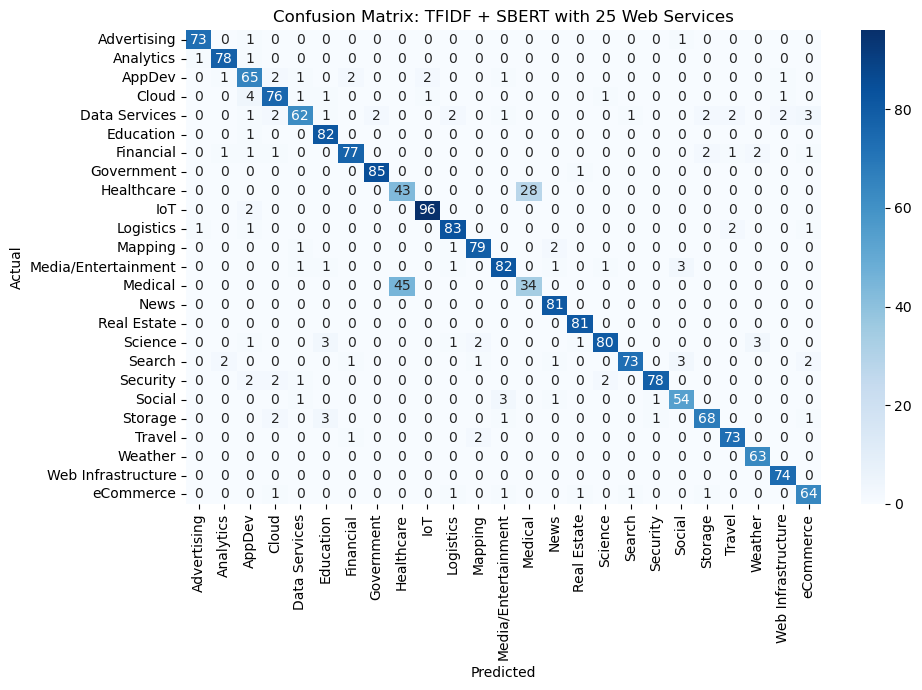


 SBERT(Scaled) with 25  Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.91      0.94        75
          Analytics       0.97      0.94      0.96        80
             AppDev       0.86      0.91      0.88        75
              Cloud       0.83      0.93      0.88        85
      Data Services       1.00      0.74      0.85        81
          Education       0.87      0.94      0.90        83
          Financial       0.89      0.90      0.89        86
         Government       0.86      0.95      0.91        86
         Healthcare       0.49      0.61      0.54        71
                IoT       0.99      1.00      0.99        98
          Logistics       0.94      0.94      0.94        88
            Mapping       0.93      0.95      0.94        83
Media/Entertainment       0.89      0.92      0.91        90
            Medical       0.55      0.43      0.48        79
               News   

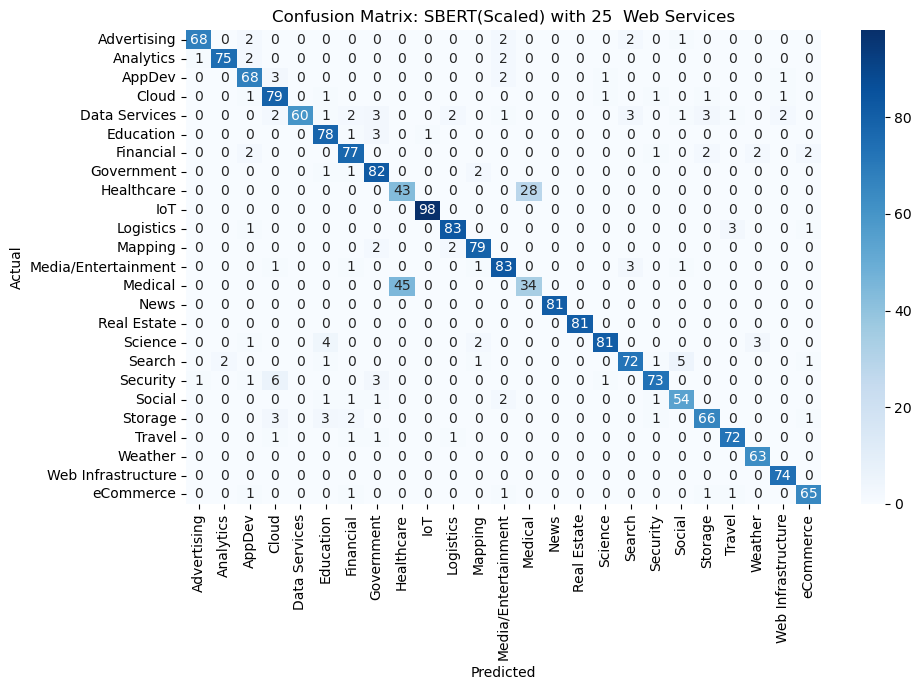


 TFIDF + SBERT(Scaled) with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.99      0.97      0.98        75
          Analytics       0.96      0.94      0.95        80
             AppDev       0.83      0.91      0.87        75
              Cloud       0.92      0.91      0.91        85
      Data Services       0.97      0.77      0.86        81
          Education       0.93      0.99      0.96        83
          Financial       0.91      0.87      0.89        86
         Government       0.93      0.93      0.93        86
         Healthcare       0.49      0.61      0.54        71
                IoT       0.99      1.00      0.99        98
          Logistics       0.93      0.94      0.94        88
            Mapping       0.94      0.95      0.95        83
Media/Entertainment       0.91      0.91      0.91        90
            Medical       0.55      0.43      0.48        79
               

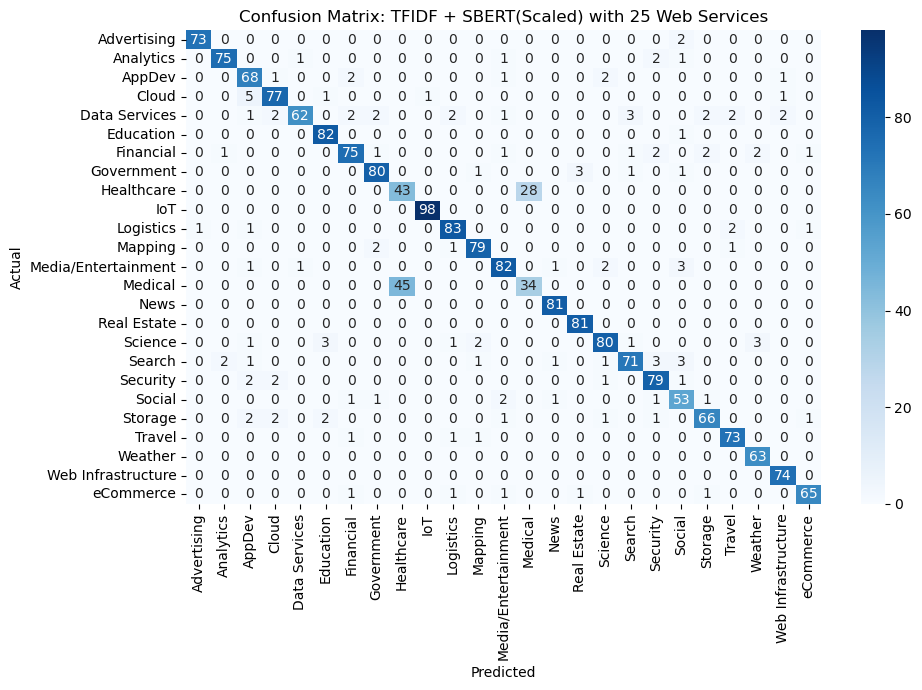

In [55]:

def train_and_report_random_forest(X_train, X_test, y_train, y_test, name="Model"):
    # Compute class weights
    classes = np.unique(y_train)
    weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weights_dict = dict(zip(classes, weights))

    # Train model with class weights
    model = RandomForestClassifier(n_estimators=200, class_weight=class_weights_dict, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    print("\nConfusion Matrix:\n")
    # Heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return {
        "model": f"RandomForestClassifier  {name}",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

for n in [25]:

    tfidf_df = pd.read_csv(f"Processed_Top_25_Web_Services_TFIDF.csv")
    sbert_df = pd.read_csv(f"Processed_Top_25_Web_Services_SBERT_Embeddings.csv")
    original_df = pd.read_csv(f"Balanced_Top_25_Web_Services.csv")
    labels = original_df['Grouped Category'].fillna("Unknown")

    combined_df = pd.concat([tfidf_df, sbert_df], axis=1)


    X_train, X_test, y_train, y_test = train_test_split(combined_df, labels, test_size=0.2, random_state=42)
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_df, labels, test_size=0.2, random_state=42)
    X_train_sbert, X_test_sbert, _, _ = train_test_split(sbert_df, labels, test_size=0.2, random_state=42)


    result = train_and_report_random_forest(X_train_tfidf, X_test_tfidf, y_train, y_test, name=f"TF-IDF with {n} Web Services")
    rf_model_results.append(result)
    result = train_and_report_random_forest(X_train_sbert, X_test_sbert, y_train, y_test, name=f"SBERT with {n} Web Services")
    rf_model_results.append(result)
    result = train_and_report_random_forest(X_train, X_test, y_train, y_test, name=f"TFIDF + SBERT with {n} Web Services")
    rf_model_results.append(result)
    # Standardize SBERT features
    scaler = StandardScaler()
    X_train_sbert_scaled = scaler.fit_transform(X_train_sbert)
    X_test_sbert_scaled = scaler.transform(X_test_sbert)

    X_train_tfidf_scaled = X_train_tfidf  
    X_test_tfidf_scaled = X_test_tfidf

    # Combine scaled features
    X_train_combined = np.hstack([X_train_tfidf_scaled, X_train_sbert_scaled])
    X_test_combined = np.hstack([X_test_tfidf_scaled, X_test_sbert_scaled])

    # Run 
    result = train_and_report_random_forest(X_train_sbert_scaled, X_test_sbert_scaled, y_train, y_test, name=f"SBERT(Scaled) with {n}  Web Services")
    rf_model_results.append(result)
    result = train_and_report_random_forest(X_train_combined, X_test_combined, y_train, y_test, name=f"TFIDF + SBERT(Scaled) with {n} Web Services")
    rf_model_results.append(result)

### 10.1  Web Service Classification using Random Forest - Summary

                                               model  accuracy  precision  \
0  RandomForestClassifier  TF-IDF with 25 Web Ser...    0.8875   0.889051   
1  RandomForestClassifier  SBERT with 25 Web Serv...    0.8910   0.893177   
2  RandomForestClassifier  TFIDF + SBERT with 25 ...    0.9020   0.903112   
3  RandomForestClassifier  SBERT(Scaled) with 25 ...    0.8945   0.897200   
4  RandomForestClassifier  TFIDF + SBERT(Scaled) ...    0.8985   0.899829   

   recall  f1_score  
0  0.8875  0.886858  
1  0.8910  0.890451  
2  0.9020  0.901282  
3  0.8945  0.893952  
4  0.8985  0.897777  


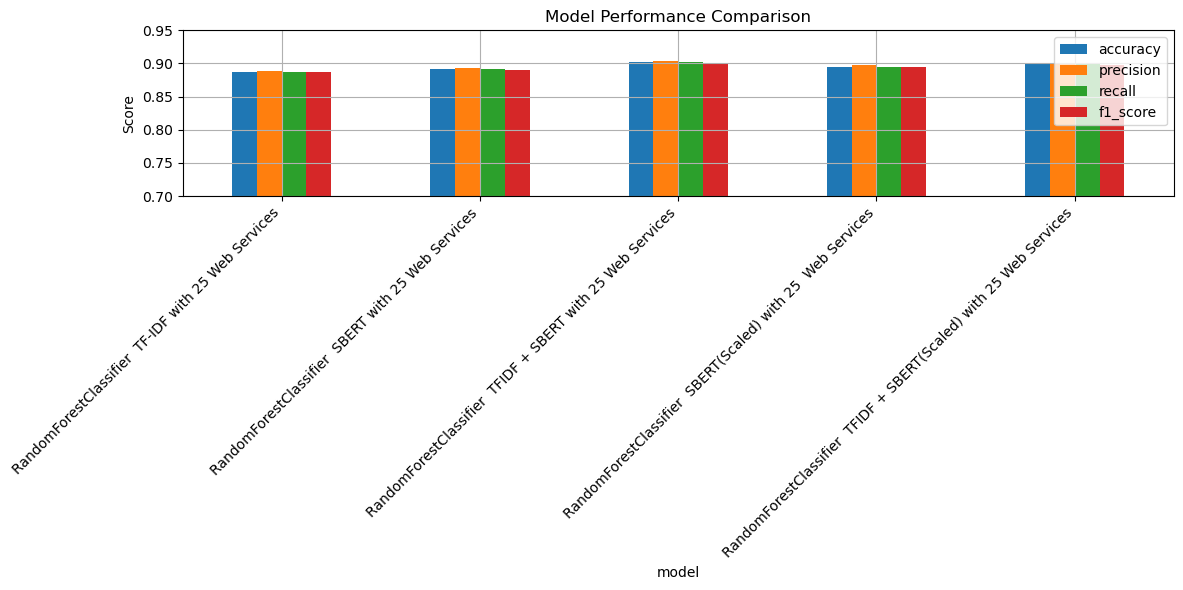

In [57]:
results_df = pd.DataFrame(rf_model_results)
print(results_df)
df_plot = results_df.set_index('model')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.95)
plt.tight_layout()
plt.grid(True)
plt.show()

## 11. Web Service Classification using XGBoost

In [58]:
xg_model_results = []


TF-IDF with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.94      0.96      0.95        75
          Analytics       0.97      0.97      0.97        80
             AppDev       0.83      0.91      0.87        75
              Cloud       0.89      0.92      0.90        85
      Data Services       0.83      0.77      0.79        81
          Education       0.95      0.95      0.95        83
          Financial       0.90      0.87      0.89        86
         Government       0.95      0.92      0.93        86
         Healthcare       0.44      0.45      0.44        71
                IoT       0.98      0.98      0.98        98
          Logistics       0.96      0.92      0.94        88
            Mapping       0.94      0.94      0.94        83
Media/Entertainment       0.95      0.84      0.89        90
            Medical       0.48      0.48      0.48        79
               News       0.93 

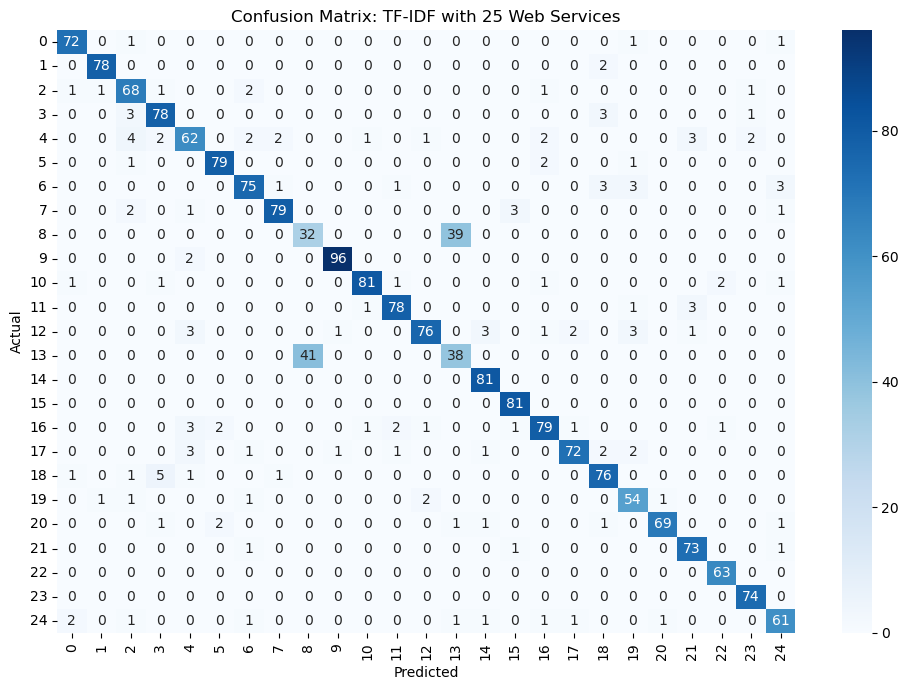


SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.92      0.95        75
          Analytics       0.96      0.94      0.95        80
             AppDev       0.86      0.93      0.90        75
              Cloud       0.93      0.92      0.92        85
      Data Services       0.87      0.84      0.86        81
          Education       0.93      0.93      0.93        83
          Financial       0.96      0.90      0.93        86
         Government       0.92      0.97      0.94        86
         Healthcare       0.45      0.48      0.47        71
                IoT       0.98      0.98      0.98        98
          Logistics       0.93      0.92      0.93        88
            Mapping       0.87      0.93      0.90        83
Media/Entertainment       0.90      0.91      0.91        90
            Medical       0.51      0.48      0.49        79
               News       0.95  

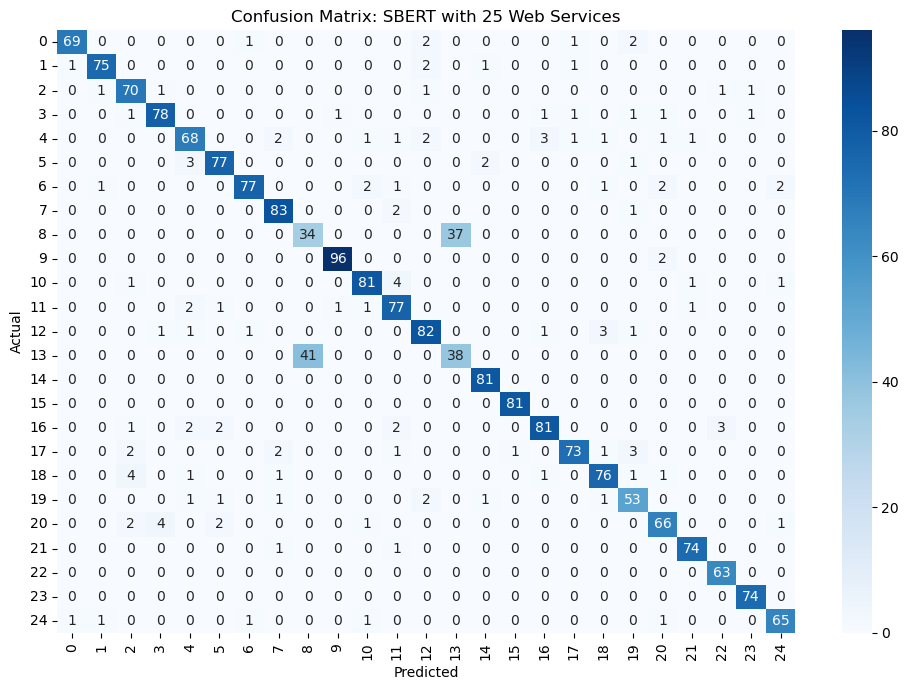


TFIDF + SBERT with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.96      0.97        75
          Analytics       0.97      0.95      0.96        80
             AppDev       0.86      0.92      0.89        75
              Cloud       0.87      0.92      0.89        85
      Data Services       0.96      0.83      0.89        81
          Education       0.92      0.94      0.93        83
          Financial       0.90      0.90      0.90        86
         Government       0.91      0.94      0.93        86
         Healthcare       0.45      0.48      0.47        71
                IoT       0.98      0.98      0.98        98
          Logistics       0.93      0.94      0.94        88
            Mapping       0.94      0.94      0.94        83
Media/Entertainment       0.92      0.90      0.91        90
            Medical       0.50      0.48      0.49        79
               News     

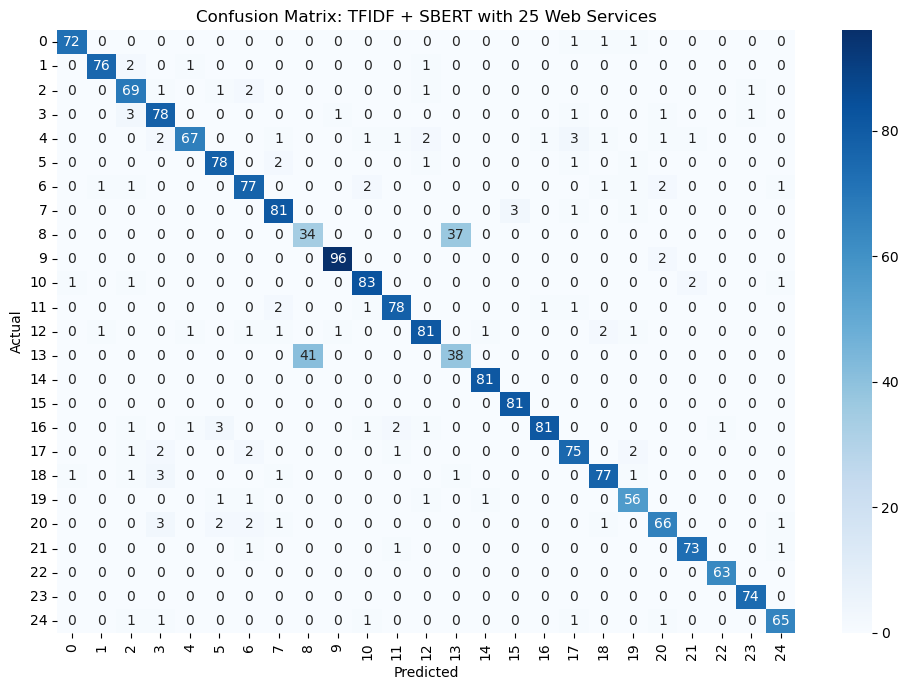


SBERT (Scaled) with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.92      0.95        75
          Analytics       0.91      0.94      0.93        80
             AppDev       0.88      0.92      0.90        75
              Cloud       0.93      0.93      0.93        85
      Data Services       0.88      0.83      0.85        81
          Education       0.93      0.93      0.93        83
          Financial       0.94      0.87      0.90        86
         Government       0.91      0.95      0.93        86
         Healthcare       0.45      0.48      0.47        71
                IoT       0.97      0.98      0.97        98
          Logistics       0.93      0.92      0.93        88
            Mapping       0.89      0.93      0.91        83
Media/Entertainment       0.89      0.90      0.90        90
            Medical       0.51      0.48      0.49        79
               News    

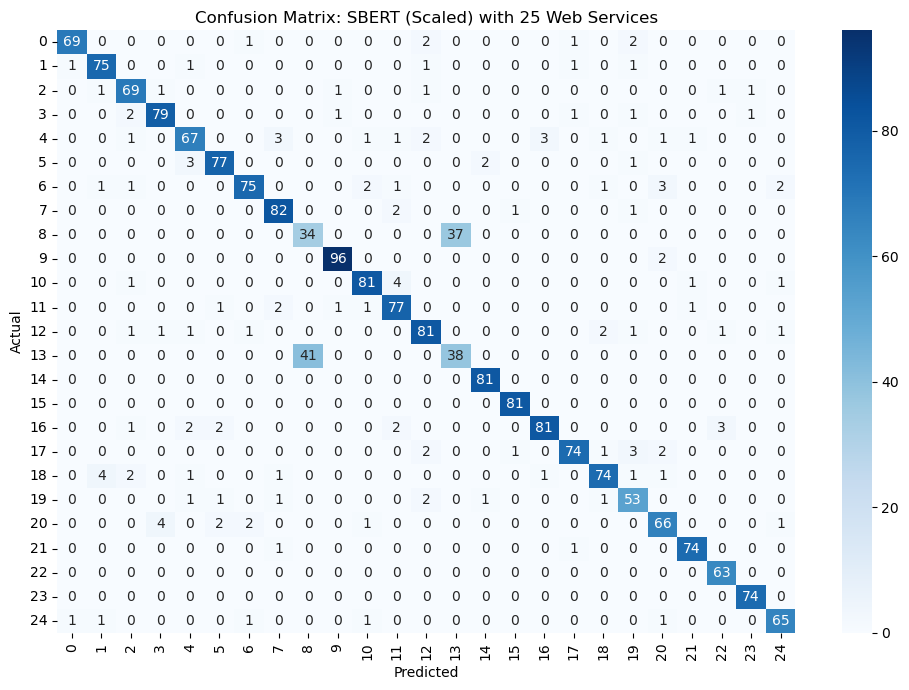


TFIDF + SBERT (Scaled) with 25 Web Services Classification Report:

                     precision    recall  f1-score   support

        Advertising       0.97      0.96      0.97        75
          Analytics       0.97      0.95      0.96        80
             AppDev       0.86      0.93      0.90        75
              Cloud       0.88      0.92      0.90        85
      Data Services       0.96      0.80      0.87        81
          Education       0.93      0.98      0.95        83
          Financial       0.90      0.91      0.90        86
         Government       0.94      0.95      0.95        86
         Healthcare       0.45      0.48      0.47        71
                IoT       0.96      0.98      0.97        98
          Logistics       0.94      0.93      0.94        88
            Mapping       0.94      0.98      0.96        83
Media/Entertainment       0.94      0.90      0.92        90
            Medical       0.51      0.48      0.49        79
               

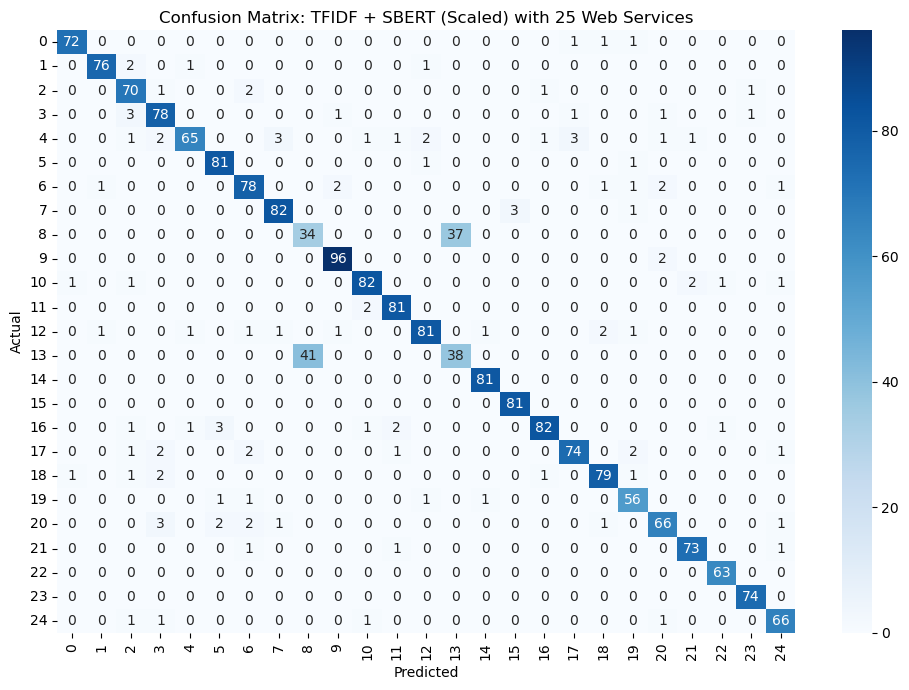

In [59]:
# Label encoder
label_encoder = LabelEncoder()

def train_and_report_xgboost(X_train, X_test, y_train_text, y_test_text, name="Model"):
    # Encode class labels
    y_train = label_encoder.fit_transform(y_train_text)
    y_test = label_encoder.transform(y_test_text)

    # Compute class weights
    classes = np.unique(y_train)
    weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weights_dict = dict(zip(classes, weights))
    sample_weights = np.array([class_weights_dict[label] for label in y_train])

    # Train model
    model = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = model.predict(X_test)

    # Decode labels for reporting
    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test_labels, y_pred_labels))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    print("\nConfusion Matrix:\n")
    # Heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y_test), 
                yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return {
        "model": f"XGBClassifier  {name}",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }


for n in [25]:

    tfidf_df = pd.read_csv(f"Processed_Top_25_Web_Services_TFIDF.csv")
    sbert_df = pd.read_csv(f"Processed_Top_25_Web_Services_SBERT_Embeddings.csv")
    original_df = pd.read_csv(f"Balanced_Top_25_Web_Services.csv")
    labels = original_df['Grouped Category'].fillna("Unknown")

    combined_df = pd.concat([tfidf_df, sbert_df], axis=1)


    X_train, X_test, y_train, y_test = train_test_split(combined_df, labels, test_size=0.2, random_state=42)
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_df, labels, test_size=0.2, random_state=42)
    X_train_sbert, X_test_sbert, _, _ = train_test_split(sbert_df, labels, test_size=0.2, random_state=42)


    result = train_and_report_xgboost(X_train_tfidf, X_test_tfidf, y_train, y_test, name=f"TF-IDF with {n} Web Services")
    xg_model_results.append(result)
    result = train_and_report_xgboost(X_train_sbert, X_test_sbert, y_train, y_test, name=f"SBERT with {n} Web Services")
    xg_model_results.append(result)
    result = train_and_report_xgboost(X_train, X_test, y_train, y_test, name=f"TFIDF + SBERT with {n} Web Services")
    xg_model_results.append(result)
    
    # Standardize SBERT features
    scaler = StandardScaler()
    X_train_sbert_scaled = scaler.fit_transform(X_train_sbert)
    X_test_sbert_scaled = scaler.transform(X_test_sbert)

    X_train_tfidf_scaled = X_train_tfidf  
    X_test_tfidf_scaled = X_test_tfidf

    # Combine scaled features
    X_train_combined = np.hstack([X_train_tfidf_scaled, X_train_sbert_scaled])
    X_test_combined = np.hstack([X_test_tfidf_scaled, X_test_sbert_scaled])

    # Run reports
    result = train_and_report_xgboost(X_train_sbert_scaled, X_test_sbert_scaled, y_train, y_test, name=f"SBERT (Scaled) with {n} Web Services")
    xg_model_results.append(result)

    result = train_and_report_xgboost(X_train_combined, X_test_combined, y_train, y_test, name=f"TFIDF + SBERT (Scaled) with {n} Web Services")
    xg_model_results.append(result)


### 11.1 Web Service Classification using XGBoost - Summary

                                               model  accuracy  precision  \
0         XGBClassifier  TF-IDF with 25 Web Services    0.8875   0.888587   
1          XGBClassifier  SBERT with 25 Web Services    0.8960   0.896642   
2  XGBClassifier  TFIDF + SBERT with 25 Web Services    0.9000   0.900991   
3  XGBClassifier  SBERT (Scaled) with 25 Web Serv...    0.8930   0.893463   
4  XGBClassifier  TFIDF + SBERT (Scaled) with 25 ...    0.9045   0.905150   

   recall  f1_score  
0  0.8875  0.887391  
1  0.8960  0.895914  
2  0.9000  0.900019  
3  0.8930  0.892811  
4  0.9045  0.904235  


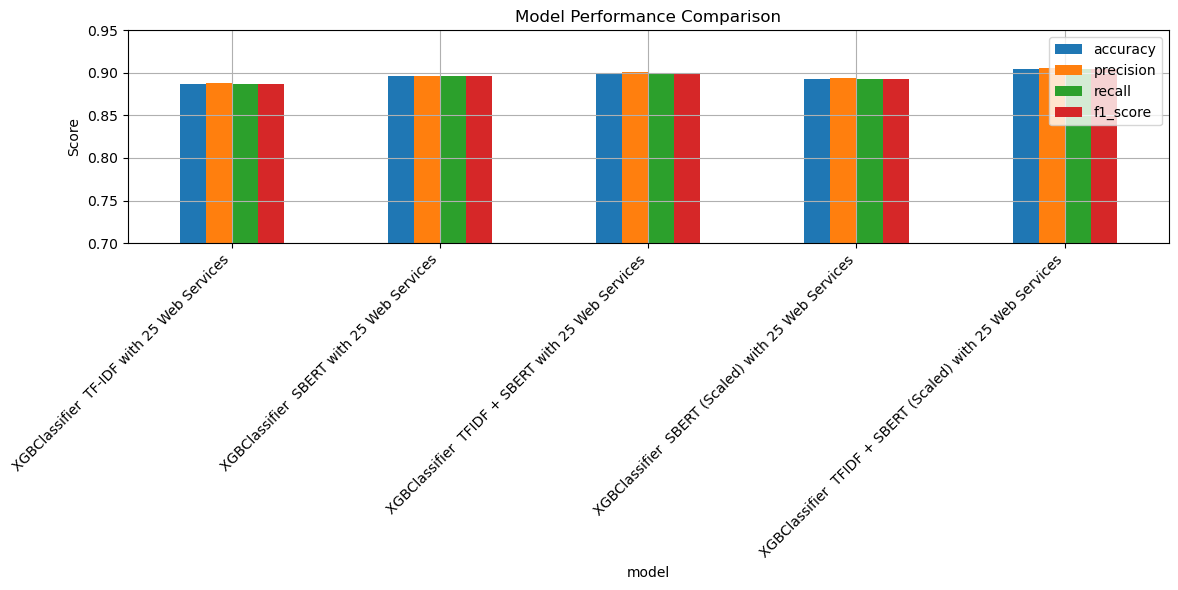

In [60]:
results_df = pd.DataFrame(xg_model_results)
print(results_df)
df_plot = results_df.set_index('model')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.95)
plt.tight_layout()
plt.grid(True)
plt.show()

## 12. Summary

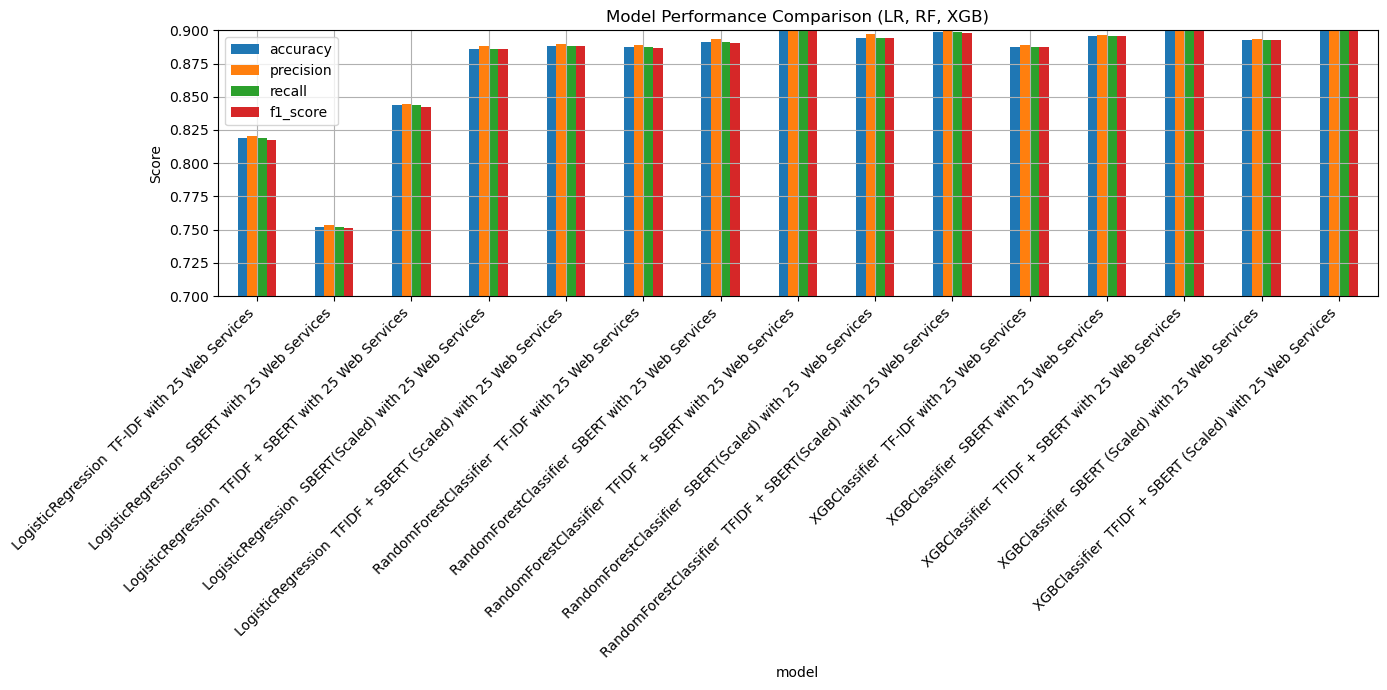

In [61]:
combined_results = lr_model_results + rf_model_results + xg_model_results
df_combined = pd.DataFrame(combined_results)

# Plotting
df_plot_combined = df_combined.set_index('model')
df_plot_combined.plot(kind='bar', figsize=(14, 7))
plt.title('Model Performance Comparison (LR, RF, XGB)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 0.9)
plt.tight_layout()
plt.grid(True)
plt.show()